TAN, Jeremy Marcus \\
204947

# Project 1

Please take note of the following guidelines.
- By submitting this notebook, you affirm that you independently worked on the project. Any collaboration between members of the class are well-documented in the appendices.
- Please cite any external resources used.
- The use of generative AI, while discouraged, is understood as part of the current landscape of coding. As such, should you use generative AI, please include your prompts and document any changes you made with the generated code. We would like to see how you phrased the questions and subdivided the tasks into functions.

This project is worth **35 points**.

# Main Reference

Shai Avidan and Ariel Shamir. 2007. *Seam carving for content-aware image resizing.* ACM Trans. Graph. 26, 3 (July 2007), 10-es. https://doi.org/10.1145/1276377.1276390

Notebook and text adapted from Guadalupe and Chan Shio, 2024.

## Overview of the Paper

Seam-carving is a content-aware image resizing technique where the image is reduced in size by one pixel of height (or width) at a time.
A *vertical seam* in an image is a path of pixels connected from the top to the bottom with one pixel in each row.
Similarly, a *horizontal seam* is a path of pixels connected from the left to the right with one pixel in each column.
Below is the original $507 \times 285$ pixel image; further below we see the result after removing 150 vertical seams, resulting in a 30% narrower image.

![](https://i.imgur.com/xj9VNkR.png)

Unlike standard content-agnostic resizing techniques (e.g., cropping and scaling), the most interesting features (aspect ratio, set of objects present, etc.) of the image are preserved.
Although the underlying algorithm is simple and elegant, it was not discovered until 2007.
Now, it is a core feature in Adobe Photoshop (called "Content-Aware Scale") and other computer graphics applications.

Seam-carving is accomplished in three main steps:
1. **Energy calculation:** The first step is to calculate the *energy* of a pixel, which is a measure of its "importance": the higher the energy, the less likely that the pixel will be included as part of a seam.
2. **Seam identification:** The next step is to identify a vertical seam of minimum total energy using dynamic programming. (Finding a horizontal seam is analogous.)
3. **Seam removal:** The final step is remove from the image all of the pixels along the vertical or horizontal seam. This will remove a less-important part of the image, while still preserving continuity in the image.

These steps are then repeated until the image has shrunk to the desired size.

Your task for this part is to implement the seam-carving technique as described in the paper by Shai Avidan and Ariel Shamir titled *Seam Carving for Content-Aware Image Resizing*. A copy of this paper is also available on Canvas. The goal is to implement the technique, and then examine and explain its performance on different kinds of input images.

First read through the paper, with emphasis on section 3.
Note that choosing the next pixel to add one at a time in a greedy manner will give sub-optimal seams; the dynamic programming solution ensures the best seam is computed.
Use the dynamic programming solution as given in the paper.

## A Very Short Introduction to Color

Thus far, we are working with grayscale images with one channel. As we would learn on our module on Color Models, you can think of the colored images that we have as a combination of three or four monochrome images (red, green, blue).

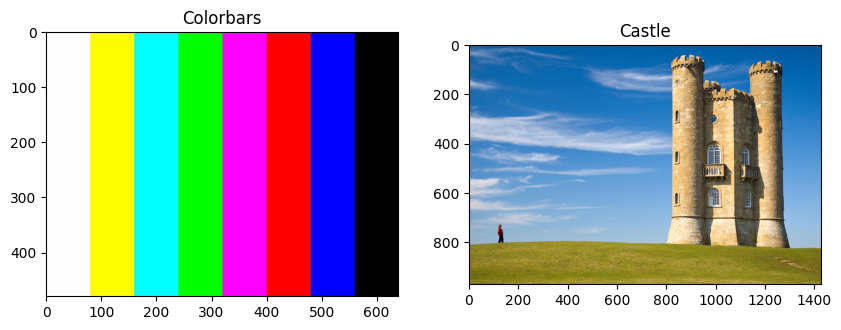

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the images
colorbar_image = Image.open('colorbars.png')
castle_image = Image.open('castle.jpg')

# Display the images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(colorbar_image)
axes[0].set_title('Colorbars')
axes[1].imshow(castle_image)
axes[1].set_title('Castle')
plt.show()

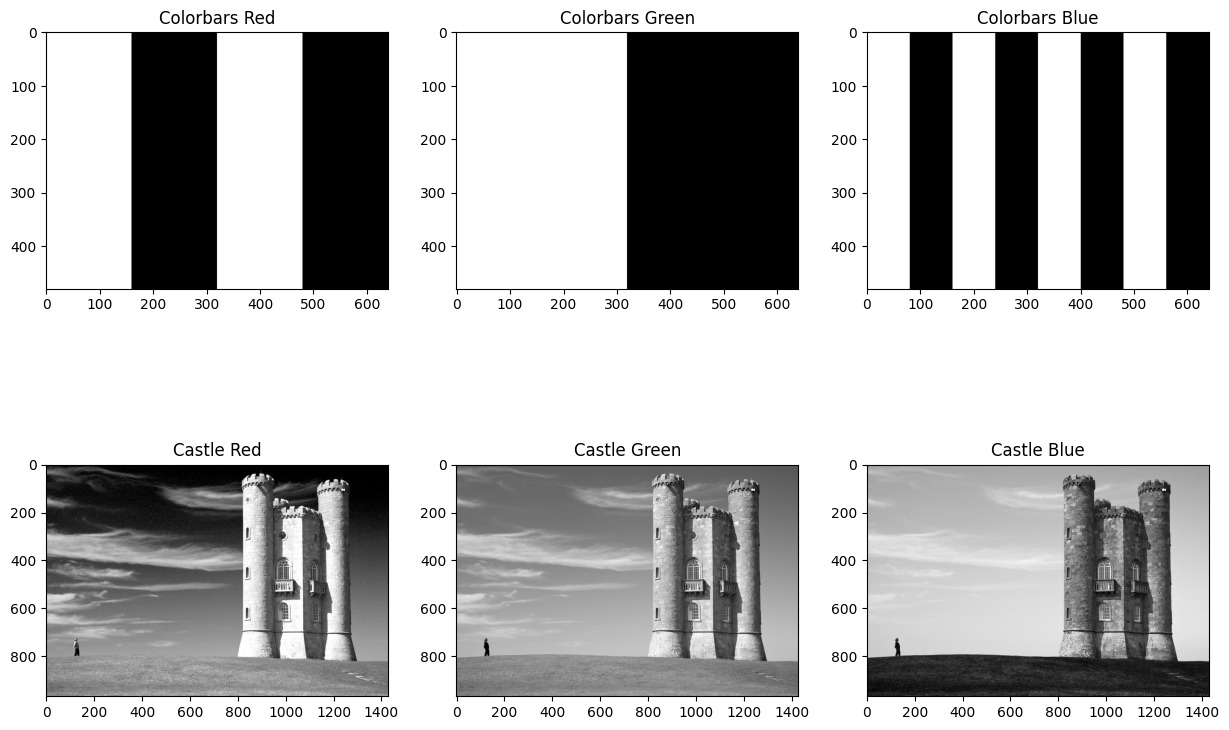

In [ ]:
import matplotlib.pyplot as plt
# Extract the red, green, blue channels
colorbar_red = colorbar_image.split()[0]
colorbar_green = colorbar_image.split()[1]
colorbar_blue = colorbar_image.split()[2]

castle_red = castle_image.split()[0]
castle_green = castle_image.split()[1]
castle_blue = castle_image.split()[2]

# Display the channels
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

axes[0, 0].imshow(colorbar_red, cmap='gray')
axes[0, 0].set_title('Colorbars Red')
axes[0, 1].imshow(colorbar_green, cmap='gray')
axes[0, 1].set_title('Colorbars Green')
axes[0, 2].imshow(colorbar_blue, cmap='gray')
axes[0, 2].set_title('Colorbars Blue')

axes[1, 0].imshow(castle_red, cmap='gray')
axes[1, 0].set_title('Castle Red')
axes[1, 1].imshow(castle_green, cmap='gray')
axes[1, 1].set_title('Castle Green')
axes[1, 2].imshow(castle_blue, cmap='gray')
axes[1, 2].set_title('Castle Blue')

plt.show()


Hence, if we would perform spatial filtering on colored images, we would do so by applying the filters to each of the channels and then recombining the channels to reproduce the final image.

The advantage of doing this method is that we can control which channel we will apply the filter to (e.g., to the red channel only, etc).

Alternatively, we can just use the native Pillow functions that we used in class.

### Smoothing

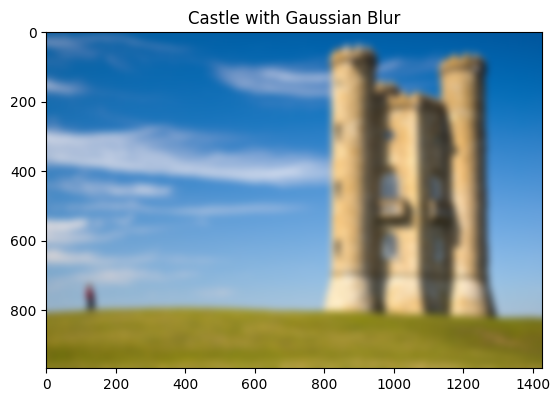

In [ ]:
from PIL import ImageFilter

# Apply Gaussian blur to the castle image
blurred_castle = castle_image.filter(ImageFilter.GaussianBlur(radius=10))

# Display the blurred image
plt.imshow(blurred_castle)
plt.title('Castle with Gaussian Blur')
plt.show()

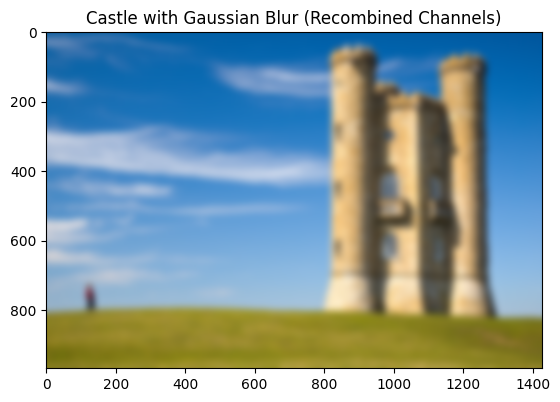

In [ ]:
# Apply Gaussian blur to each channel separately
castle_red_blurred = castle_red.filter(ImageFilter.GaussianBlur(radius=10))
castle_green_blurred = castle_green.filter(ImageFilter.GaussianBlur(radius=10))
castle_blue_blurred = castle_blue.filter(ImageFilter.GaussianBlur(radius=10))

# Recombine the blurred channels
blurred_castle_recom = Image.merge("RGB", (castle_red_blurred, castle_green_blurred, castle_blue_blurred))

# Display the blurred image
plt.imshow(blurred_castle_recom)
plt.title('Castle with Gaussian Blur (Recombined Channels)')
plt.show()


In [ ]:
import numpy as np

# Convert images to arrays
blurred_castle_array = np.array(blurred_castle)
blurred_castle_recom_array = np.array(blurred_castle_recom)

# Check if the images are identical
if np.array_equal(blurred_castle_array, blurred_castle_recom_array):
  print("The images are identical.")
else:
  print("The images are not identical.")


The images are identical.


### Sharpening

In [1]:
from PIL import Image, ImageFilter, ImageChops

# Define a 3x3 Laplacian kernel for sharpening
laplacian_kernel = [
    0, -1,  0,
   -1,  4, -1,
    0, -1,  0
]

# Apply the Laplacian kernel using ImageFilter.Kernel
# The size of the kernel is 3x3, and scale is 1 to maintain brightness
castle_laplacian = castle_image.filter(ImageFilter.Kernel((3, 3), laplacian_kernel, scale=1))

# Add sharpened_image to original image
sharpened_castle = ImageChops.add(castle_image, castle_laplacian)

# Display the combined image
plt.imshow(sharpened_castle)
plt.title('Sharpened Castle')
plt.show()


NameError: name 'castle_image' is not defined

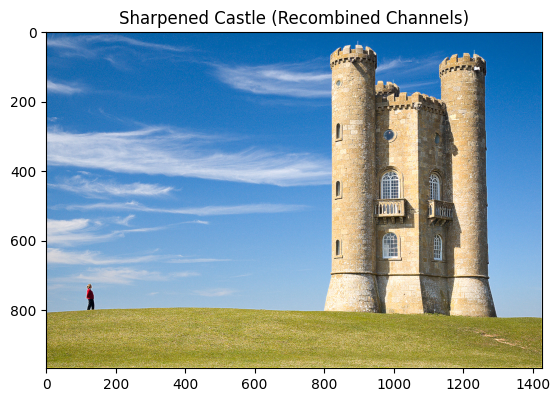

In [ ]:
# Apply the Laplacian kernel to each channel separately
castle_red_sharpened = castle_red.filter(ImageFilter.Kernel((3, 3), laplacian_kernel, scale=1))
castle_green_sharpened = castle_green.filter(ImageFilter.Kernel((3, 3), laplacian_kernel, scale=1))
castle_blue_sharpened = castle_blue.filter(ImageFilter.Kernel((3, 3), laplacian_kernel, scale=1))

# Recombine the sharpened channels
sharpened_castle_recom = Image.merge("RGB", (castle_red_sharpened, castle_green_sharpened, castle_blue_sharpened))

# Add sharpened_image to original image
sharpened_castle_recom = ImageChops.add(castle_image, sharpened_castle_recom)

# Display the combined image
plt.imshow(sharpened_castle_recom)
plt.title('Sharpened Castle (Recombined Channels)')
plt.show()


In [ ]:
# Convert images to arrays
sharpened_castle_array = np.array(sharpened_castle)
sharpened_castle_recom_array = np.array(sharpened_castle_recom)

# Check if the images are identical
if np.array_equal(sharpened_castle_array, sharpened_castle_recom_array):
  print("The images are identical.")
else:
  print("The images are not identical.")

The images are identical.


# Implementation

Implement the following Python functions that do the following tasks:
- `energy`: Compute the energy function at each pixel using the magnitude of the $x$- and $y$-gradients of the image. For the total energy of a colored image, add the energies of the three channels.
- `find_vertical_seam`: Compute the optimal vertical seam given an image
- `find_horizontal_seam`: Compute the optimal horizontal seam given an image
- `reduce_width`: Reduce the width of the image by a specified amount
- `reduce_height`: Reduce the height of the image by a specified amount

You may also define your own custom functions as you see fit.

Note that the input image is specified as a 3-dimensional array of size $H \times W \times 3$.
View the results in color, but note that the gradients should be computed component-wise.

**Some hints:**
- Consider using the built-in implementation of spatial filters from `scipy.ndimage` or `ImageFilter` instead of manually convolving a filter with an image.
- Be careful with data types! In particular, filtering should be done with `float`s, while displaying images (using `imshow`) should use `uint8`.
- Instead of reusing code from `find_vertical_seam` to implement `find_horizontal_seam`, consider transposing the image, run `find_vertical_seam`, and then transpose the image back.

Function stubs are provided below.

In [2]:
from PIL import Image
# from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import drive
# drive.mount('/content/drive')
from PIL import Image, ImageFilter, ImageChops
%matplotlib inline
from scipy.ndimage import convolve
from scipy import ndimage

In [3]:
def energy(I):

    # Extract the three channels (RGB) from the image

    I_red = I.split()[0]
    I_green = I.split()[1]
    I_blue = I.split()[2]

    # Filtering should be done with the float data type
    I_arr_red = np.array(I_red)
    I_arr_green = np.array(I_green)
    I_arr_blue = np.array(I_blue)

    I_arr_red = I_arr_red.astype('float32')
    I_arr_green = I_arr_green.astype('float32')
    I_arr_blue = I_arr_blue.astype('float32')

    sobelx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    sobely = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    cl_red_x = convolve(I_arr_red, sobelx)
    cl_red_y = convolve(I_arr_red, sobely)

    cl_green_x = convolve(I_arr_green, sobelx)
    cl_green_y = convolve(I_arr_green, sobely)

    cl_blue_x = convolve(I_arr_blue, sobelx)
    cl_blue_y = convolve(I_arr_blue, sobely)

    mag_red = np.hypot(cl_red_x, cl_red_y)
    mag_green = np.hypot(cl_green_x, cl_green_y)
    mag_blue = np.hypot(cl_blue_x, cl_blue_y)

    mag_red = np.clip(mag_red, 0, 255)
    mag_green = np.clip(mag_green, 0, 255)
    mag_blue = np.clip(mag_blue, 0, 255)

    # return the energy map
    return mag_red + mag_green + mag_blue


From "Seam Carving for Content-Aware Image Resizing", the recursive algorithm is $M(i,j) = e(i,j) + min\{M(i-1, j-1), M(i-1,j), M(i-1, j+1)\}.$

For Vertical Seams,
*   $e(i,j)$ is the energy of the pixel at position $(i,j)$.
*   $M(i,j)$ is the minimum energy value for all possible seams until the pixel at position (i,j).
*   We add the energy of the pixel at position $(i,j)$ to the minimum energy sum $M$ to reach any of the three pixels above since the pixels on a seam have to be connected.
*   We store all the $M$ values into a DP table, called bt.
*   in the last row of bt, we get the minimum value which indicates the end of the vertical seam with the lowest energy.
*   To get the path, we backtrack and get the indices of the pixels with the lowest value in each row.










In [4]:
# Use a bottom-up approach
def find_vertical_seam(I):
  I_arr = np.asarray(I, dtype = "int32")
  energy_map = energy(I)
  no_of_rows = energy_map.shape[0]
  no_of_cols = energy_map.shape[1]

  bt = np.zeros((no_of_rows, no_of_cols))

  # The first row of the dp table should be the energy of the pixels in the first row

  for i in range(no_of_cols):
    bt[0][i] = energy_map[0][i]

  # Fill the rest of the table
  for i in range(1, no_of_rows):
    for j in range(no_of_cols):

      # Handle the left edge of the image
      if j == 0:
        upper_left = float('inf') # set it to infinity so it is not selected
      else:
        upper_left = bt[i-1][j-1]

      above = bt[i-1][j]

      # Handle the right edge of the image
      if j == no_of_cols - 1:
        upper_right = float('inf')
      else:
        upper_right = bt[i-1][j+1]

      bt[i][j] = energy_map[i][j] + min(upper_left, above, upper_right)


  # We implement backtracking to find the column indices of the pixels per row which are part of the seam

  seam = [0] * no_of_rows

  # Starting with the last index (-1) for the last row

  seam[-1] = np.argmin(bt[-1])

  # We fill in the indices from the bottom going up

  for i in range(no_of_rows-2, -1, -1):
      j = seam[i+1]

      if j > 0 and j < no_of_cols-1:
          # We Compare the three values upper left, above, and upper right pixels
          left = bt[i][j-1]
          up = bt[i][j]
          right = bt[i][j+1]

          # Find the minimum value and and change the index by adding the offset (-1 for left, 0 for up, 1 for right)
          if left < up and left < right:
              offset = -1
          elif right < up:
              offset = 1
          else:
              offset = 0

          # The previous pixel was on the left edge
      elif j == 0:

          # we Compare only the above and upper right pixels
          up = bt[i][j]
          right = bt[i][j+1]
          offset = 0 if up <= right else 1

          # The previous pixel was on the right edge
      elif j == no_of_cols - 1:

          # we Compare only the above and upper left pixels
          left = bt[i][j-1]
          up = bt[i][j]
          offset = -1 if left <= up else 0

      seam[i] = j + offset

  return bt, seam

In [5]:
def find_horizontal_seam(I):

    I_arr = np.asarray(I, dtype = "int32")

    I_tranposed = np.transpose(I_arr, (1,0,2))

    I_tranposed_image = Image.fromarray(I_tranposed.astype('uint8'))

    bt, seam = find_vertical_seam(I_tranposed_image)

    # The list of indices were inverted when the image was transposed so we have to invert it back
    # Likewise, the cumulative energy map should be transposed back
    return bt.T, seam[::-1]


In [6]:
def reduce_width(I, width = 1):
  for x in range(width):
    I_arr = np.asarray(I, dtype = "int32")
    rows = I_arr.shape[0]
    cols = I_arr.shape[1]

    # Create an empty array with desired shape (rows, cols - 1, 3 )
    new_shape = (rows, cols-1, 3)
    new_image = np.empty(new_shape, dtype = np.uint8)

    bt, seam = find_vertical_seam(I)

    for row in range(rows):
      new_image[row, :, :] = np.delete(I_arr[row, :, :], seam[row], axis = 0)

    I = Image.fromarray(new_image.astype('uint8'))

  return I

In [7]:
def reduce_height(I, height=1):
  for x in range(height):
      I_arr = np.asarray(I, dtype = 'int32')
      rows = I_arr.shape[0]
      cols = I_arr.shape[1]

      # Create an empty array with desired shape (rows-1, cols, 3)
      new_shape = (rows-1,cols, 3)
      new_image = np.empty(new_shape, dtype=np.uint8)

      bt, seam = find_horizontal_seam(I)

      for col in range(cols):
        new_image[:, col, :] = np.delete(I_arr[:, col, :], seam[col], axis = 0)

      I = Image.fromarray(new_image.astype('uint8'))

  return I

In [8]:
ocean = Image.open('HJoceanSmall.jpg')
ocean_arr = np.asarray(ocean, dtype = "int32")


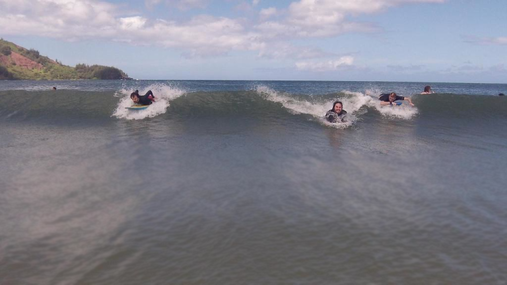

In [9]:
ocean

# Write-up

On separate Markdown and Code cells, answer the following (and include image displays where appropriate):

1. Explain why the image generated using seam carving is still rectangular.

1. Run your `reduce_width` function on the image `HJoceanSmall.jpg` to reduce the width by 100 pixels. Run your `reduce_height` function on the same image to reduce the height by 80 pixels. Display both the before and after images.

2. Display the energy function output (total gradient magnitudes) for the image `HJoceanSmall.jpg`, and the two corresponding cumulative minimum energy maps ($M$) for the seams in each direction. Explain why these outputs look the way they do given the original image's content.

3. For the same image `HJoceanSmall.jpg`, display the original image together with the first selected horizontal seam and the first selected vertical seam.

4. Make some change to the way the energy function is computed (for example, by changing the underlying filter and/or its parameters, or by incorporating some other a priori knowledge). Display the result and explain the impact on the results for some examples.

5. A straightforward [greedy approach](https://en.wikipedia.org/wiki/Greedy_algorithm) to find the lowest-energy vertical seam is to start with the pixel in the topmost row with the lowest energy, then successively choose the neighboring pixel on the next row with the lowest energy. Give a small counterexample in which this greedy algorithm fails to find the optimal seam, as opposed to the optimal DP solution. (You may implement the greedy algorithm on your own, but it's not required.)

7. Describe what makes an image suitable to the seam-carving approach (in terms of preserving the content and structure of the original image, without introducing visual artifacts). Describe an image that would not work well. Support your answers by including results involving **your own** example images.

8. Are smoothening and seam-carving commutative operations? Demonstrate and explain.

9. Are sharpening and seam-carving commutative operations? Demonstrate and explain.


## Answers

1. Explain why the image generated using seam carving is still rectangular.

Seam carving is an image resizing algorithm which removes or carves out rows or columns of pixels from an image. Since the same number of pixels from each column or row are removed in each iteration, the overall shape of the image remains the same. The aspect ratio of the image will be altered depending on how many vertical or horizontal seams were carved from the original image.

For example, given this rectangular image of size 285 x 507.

(285, 507, 3)


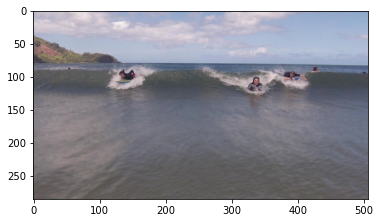

In [10]:
ocean = Image.open('HJoceanSmall.jpg')
ocean_arr = np.asarray(ocean, dtype = "int32")
print(ocean_arr.shape)

plt.imshow(ocean_arr)

We implement vertical seam carving to reduce the width of this image by 50 pixels. Since only 50 vertical seams were carved from the image, the shape of the image remains rectangular.

(285, 457, 3)


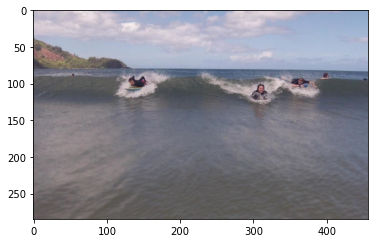

In [11]:
reduced_width_ocean = reduce_width(ocean, 50)
reduced_width_ocean_arr = np.asarray(reduced_width_ocean, dtype = "int32")
print(reduced_width_ocean_arr.shape)

plt.imshow(reduced_width_ocean_arr)

2. Run your reduce_width function on the image HJoceanSmall.jpg to reduce the width by 100 pixels. Run your reduce_height function on the same image to reduce the height by 80 pixels. Display both the before and after images.

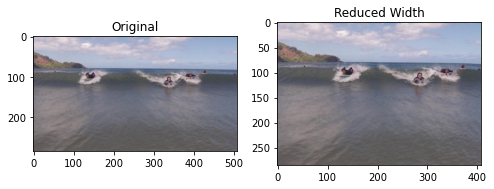

In [13]:
ocean = Image.open('HJoceanSmall.jpg')
ocean_arr = np.asarray(ocean, dtype = "int32")

reduced_width_ocean = reduce_width(ocean, 100)
reduced_width_ocean_arr = np.asarray(reduced_width_ocean, dtype = "int32")

# Get the dimensions of the images
height1, width1 = ocean_arr.shape[:2]
height2, width2 = reduced_width_ocean_arr.shape[:2]

# Calculate the appropriate figure size
aspect_ratio1 = width1 / height1
aspect_ratio2 = width2 / height2

# Set a base height for the figure and adjust the width based on aspect ratios
base_height = 5
fig_width = base_height * (aspect_ratio1 + aspect_ratio2) / 2  # Average of the aspect ratios

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (fig_width, base_height))
ax[0].imshow(ocean_arr, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(reduced_width_ocean_arr, cmap='gray')
ax[1].set_title('Reduced Width')
plt.show()


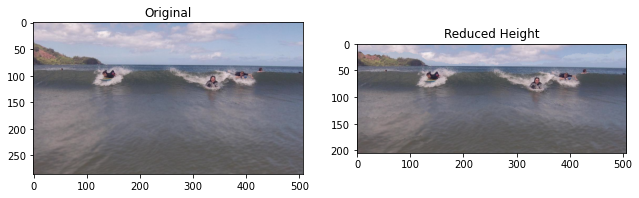

In [14]:
ocean = Image.open('HJoceanSmall.jpg')
ocean_arr = np.asarray(ocean, dtype = "int32")

reduced_height_ocean = reduce_height(ocean, 80)
reduced_height_ocean_arr = np.asarray(reduced_height_ocean, dtype = "int32")

# Get the dimensions of the images
height1, width1 = ocean_arr.shape[:2]
height2, width2 = reduced_height_ocean_arr.shape[:2]

# Calculate the appropriate figure size
aspect_ratio1 = width1 / height1
aspect_ratio2 = width2 / height2

# Set a base height for the figure and adjust the width based on aspect ratios
base_height = 5
fig_width = base_height * (aspect_ratio1 + aspect_ratio2) / 2  # Average of the aspect ratios

import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 2, figsize = (fig_width, base_height))
ax[0].imshow(ocean_arr, cmap='gray')
ax[0].set_title('Original')
ax[1].imshow(reduced_height_ocean_arr, cmap='gray')
ax[1].set_title('Reduced Height')
plt.show()


3. Display the energy function output (total gradient magnitudes) for the image `HJoceanSmall.jpg`, and the two corresponding cumulative minimum energy maps ($M$) for the seams in each direction. Explain why these outputs look the way they do given the original image's content.

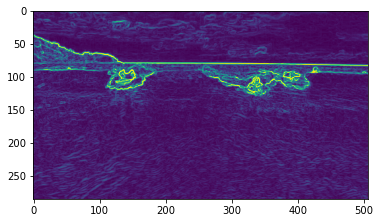

In [15]:
ocean_energy_map = energy(ocean)

plt.imshow(ocean_energy_map)

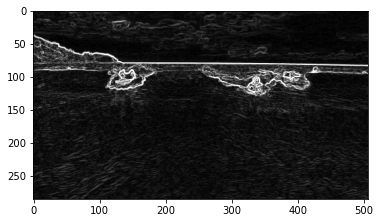

In [16]:
plt.imshow(ocean_energy_map, cmap = 'gray')

The low energy areas of the image are the dark parts of the energy map. These lower-energy areas are the sky on top and the water at the bottom of the image. Since the pixels in both the sky and the water are both very similar to the neighboring pixels, these pixels would have a low energy value. On the other hand, the light parts of the image, the people on the water, are the high energy areas of the image. The pixels in the high energy areas are the most significant since there are large changes in the pixel values when compared to neighboring pixels.

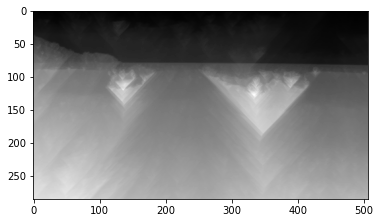

In [17]:
# Vertical Seams Cumulative Minimum Energy Map

M_vertical, vertical_seam = find_vertical_seam(ocean)
plt.imshow(M_vertical, cmap = "gray")

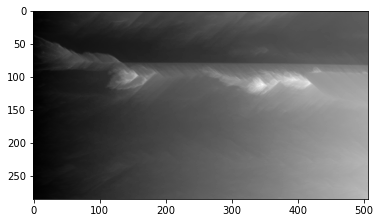

In [18]:
# Horizontal Seams Cumulative Minimum Energy Map

M_horizontal, horizontal_seam = find_horizontal_seam(ocean)
plt.imshow(M_horizontal, cmap = "gray")

The lighter parts of the cumulative minimum energy map represent the parts of the image which are more important or significant, the people on the water. Thus, according to our seam carving algorithm, we would not carve out the pixels of these higher energy parts of the image.

4. For the same image `HJoceanSmall.jpg`, display the original image together with the first selected horizontal seam and the first selected vertical seam.

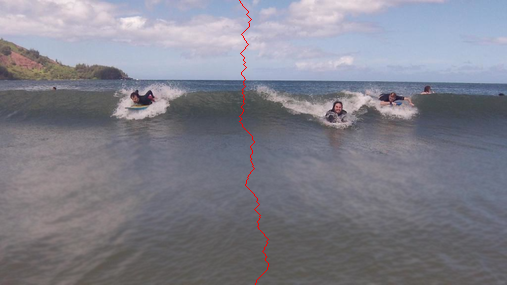

In [20]:
# 4. Display the first selected vertical seam
from PIL import Image, ImageDraw
im = Image.open('HJoceanSmall.jpg')

bt, seam = find_vertical_seam(im)

draw = ImageDraw.Draw(im)
color = (255,0,0) # color red

for row in range(len(seam)):
  col = seam[row]
  draw.point((col, row), fill = color)

im

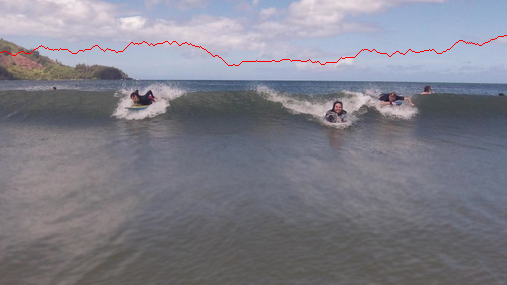

In [22]:
# 4. Display the first selected horizontal seam
from PIL import Image, ImageDraw
im = Image.open('HJoceanSmall.jpg')

bt, seam = find_horizontal_seam(im)

draw = ImageDraw.Draw(im)
color = (255,0,0) # color red

for col in range(len(seam)):
  row = seam[col]
  draw.point((col, row), fill = color)

im

5. Make some change to the way the energy function is computed (for example, by changing the underlying filter and/or its parameters, or by incorporating some other a priori knowledge). Display the result and explain the impact on the results for some examples.

In [26]:
# Edit the energy function
# 1. Apply Box Filter before calculating the energy

def energy_box_filter(I):

    # Extract the three channels (RGB) from the image

    I_red = I.split()[0]
    I_green = I.split()[1]
    I_blue = I.split()[2]

    # Apply the box filter on each channel

    I_red = I_red.filter(ImageFilter.BoxBlur(3))
    I_green = I_green.filter(ImageFilter.BoxBlur(3))
    I_blue = I_blue.filter(ImageFilter.BoxBlur(3))

    # Filtering should be done with the float data type
    I_arr_red = np.array(I_red)
    I_arr_green = np.array(I_green)
    I_arr_blue = np.array(I_blue)

    I_arr_red = I_arr_red.astype('float32')
    I_arr_green = I_arr_green.astype('float32')
    I_arr_blue = I_arr_blue.astype('float32')

    sobelx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    sobely = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    cl_red_x = convolve(I_arr_red, sobelx)
    cl_red_y = convolve(I_arr_red, sobely)

    cl_green_x = convolve(I_arr_green, sobelx)
    cl_green_y = convolve(I_arr_green, sobely)

    cl_blue_x = convolve(I_arr_blue, sobelx)
    cl_blue_y = convolve(I_arr_blue, sobely)

    mag_red = np.hypot(cl_red_x, cl_red_y)
    mag_green = np.hypot(cl_green_x, cl_green_y)
    mag_blue = np.hypot(cl_blue_x, cl_blue_y)

    mag_red = np.clip(mag_red, 0, 255)
    mag_green = np.clip(mag_green, 0, 255)
    mag_blue = np.clip(mag_blue, 0, 255)

    # return the energy map
    return mag_red + mag_green + mag_blue




In [27]:
# Edit the energy function
# 2. Apply Gaussian Filter before calculating the energy

def energy_gaussian_filter(I):

    # Extract the three channels (RGB) from the image

    I_red = I.split()[0]
    I_green = I.split()[1]
    I_blue = I.split()[2]

    # Apply the gaussian filter on each channel

    I_red = I_red.filter(ImageFilter.GaussianBlur(3))
    I_green = I_green.filter(ImageFilter.GaussianBlur(3))
    I_blue = I_blue.filter(ImageFilter.GaussianBlur(3))

    # Filtering should be done with the float data type
    I_arr_red = np.array(I_red)
    I_arr_green = np.array(I_green)
    I_arr_blue = np.array(I_blue)

    I_arr_red = I_arr_red.astype('float32')
    I_arr_green = I_arr_green.astype('float32')
    I_arr_blue = I_arr_blue.astype('float32')

    sobelx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    sobely = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    cl_red_x = convolve(I_arr_red, sobelx)
    cl_red_y = convolve(I_arr_red, sobely)

    cl_green_x = convolve(I_arr_green, sobelx)
    cl_green_y = convolve(I_arr_green, sobely)

    cl_blue_x = convolve(I_arr_blue, sobelx)
    cl_blue_y = convolve(I_arr_blue, sobely)

    mag_red = np.hypot(cl_red_x, cl_red_y)
    mag_green = np.hypot(cl_green_x, cl_green_y)
    mag_blue = np.hypot(cl_blue_x, cl_blue_y)

    mag_red = np.clip(mag_red, 0, 255)
    mag_green = np.clip(mag_green, 0, 255)
    mag_blue = np.clip(mag_blue, 0, 255)

    # return the energy map
    return mag_red + mag_green + mag_blue


In [28]:
# Edit the energy function
# 3. Apply Median Filter before calculating the energy

def energy_median_filter(I):

    # Extract the three channels (RGB) from the image

    I_red = I.split()[0]
    I_green = I.split()[1]
    I_blue = I.split()[2]

    # Apply the median filter on each channel

    I_red = I_red.filter(ImageFilter.MedianFilter(3))
    I_green = I_green.filter(ImageFilter.MedianFilter(3))
    I_blue = I_blue.filter(ImageFilter.MedianFilter(3))

    # Filtering should be done with the float data type
    I_arr_red = np.array(I_red)
    I_arr_green = np.array(I_green)
    I_arr_blue = np.array(I_blue)

    I_arr_red = I_arr_red.astype('float32')
    I_arr_green = I_arr_green.astype('float32')
    I_arr_blue = I_arr_blue.astype('float32')

    sobelx = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
    sobely = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

    cl_red_x = convolve(I_arr_red, sobelx)
    cl_red_y = convolve(I_arr_red, sobely)

    cl_green_x = convolve(I_arr_green, sobelx)
    cl_green_y = convolve(I_arr_green, sobely)

    cl_blue_x = convolve(I_arr_blue, sobelx)
    cl_blue_y = convolve(I_arr_blue, sobely)

    mag_red = np.hypot(cl_red_x, cl_red_y)
    mag_green = np.hypot(cl_green_x, cl_green_y)
    mag_blue = np.hypot(cl_blue_x, cl_blue_y)

    mag_red = np.clip(mag_red, 0, 255)
    mag_green = np.clip(mag_green, 0, 255)
    mag_blue = np.clip(mag_blue, 0, 255)

    # return the energy map
    return mag_red + mag_green + mag_blue

In [29]:
# Edit the energy function
# 4. Replace the sobel kernel with the Laplacian kernel

def energy_laplacian_filter(I):

    # Extract the three channels (RGB) from the image

    I_red = I.split()[0]
    I_green = I.split()[1]
    I_blue = I.split()[2]

    # Filtering should be done with the float data type
    I_arr_red = np.array(I_red)
    I_arr_green = np.array(I_green)
    I_arr_blue = np.array(I_blue)

    I_arr_red = I_arr_red.astype('float32')
    I_arr_green = I_arr_green.astype('float32')
    I_arr_blue = I_arr_blue.astype('float32')

    laplacian = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

    cl_red = convolve(I_arr_red, laplacian)

    cl_green = convolve(I_arr_green, laplacian)

    cl_blue = convolve(I_arr_blue, laplacian)

    mag_red = np.clip(cl_red, 0, 255)
    mag_green = np.clip(cl_green, 0, 255)
    mag_blue = np.clip(cl_blue, 0, 255)

    # return the energy map
    return mag_red + mag_green + mag_blue

Compare the energy maps

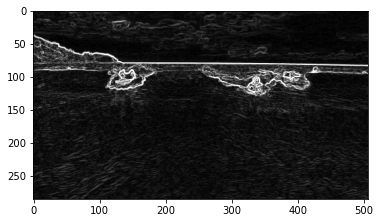

In [31]:
ocean = Image.open('HJoceanSmall.jpg')
ocean_energy_map = energy(ocean)

plt.imshow(ocean_energy_map, cmap = "gray")

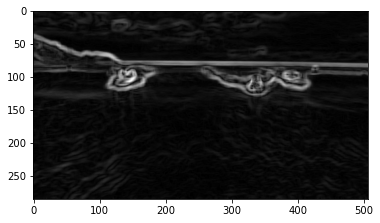

In [33]:
ocean = Image.open('HJoceanSmall.jpg')
ocean_energy_map_box = energy_box_filter(ocean)

plt.imshow(ocean_energy_map_box, cmap = "gray")

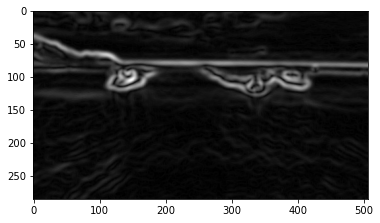

In [34]:
ocean = Image.open('HJoceanSmall.jpg')
ocean_energy_map_gaussian = energy_gaussian_filter(ocean)

plt.imshow(ocean_energy_map_gaussian, cmap = "gray")

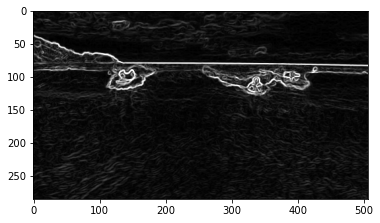

In [35]:
ocean = Image.open('HJoceanSmall.jpg')
ocean_energy_map_median = energy_median_filter(ocean)

plt.imshow(ocean_energy_map_median, cmap = "gray")

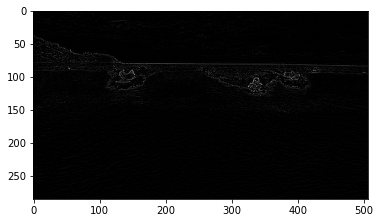

In [36]:
ocean = Image.open('HJoceanSmall.jpg')
ocean_energy_map_laplacian = energy_laplacian_filter(ocean)

plt.imshow(ocean_energy_map_laplacian, cmap = "gray")

Changing the preprocessing steps in the energy function significantly changes the resulting energy map. When the box filter was applied, the areas of high energy were more dispersed and spread out as a result of the smoothing filter. Likewise, when the gaussian filter was applied, the dispersion of the high-energy areas was even more noticeable. When the median filter was applied, the resulting energy map was similar to the original energy map. Lastly, when the Laplacian kernel was used to replace the Sobel kernels, the energy map's values significantly decreased.

6. A straightforward greedy approach to find the lowest-energy vertical seam is to start with the pixel in the topmost row with the lowest energy, then successively choose the neighboring pixel on the next row with the lowest energy. Give a small counterexample in which this greedy algorithm fails to find the optimal seam, as opposed to the optimal DP solution. (You may implement the greedy algorithm on your own, but it's not required.)

In [37]:
# Here is a simple 3x3 pixel image to illustrate how the greedy algorithm will find a different seam as compared to the optimal
counter_example = np.array([
    [[100, 100, 100], [99, 95, 100], [100, 100, 100]],
    [[100, 100, 100], [100, 100, 100], [150, 100, 100]],
    [[10, 200, 200], [100, 100, 100], [100, 100, 100]]
])

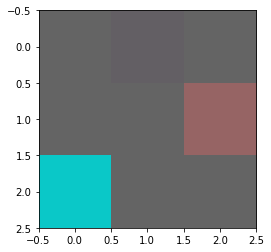

In [38]:
plt.imshow(counter_example)

In [39]:
# The following is the energy map for the image.

energy(Image.fromarray(counter_example.astype('uint8')))

array([[ 18.973665,  82.138756, 175.84264 ],
       [765.      , 499.47165 , 108.07602 ],
       [765.      , 765.      , 158.11388 ]], dtype=float32)

According to the greedy algorithm, on the first row, we would pick the pixel on the first column since it has the lowest energy. On the next row, the neighboring pixel with the lowest energy is the pixel on the second column. On the third row, the neighboring pixel with the lowest energy would be the pixel on the last row.

$$\text{Energy of the vertical seam (greedy algorithm)} = 18.973665 + 499.47165 + 158.11388 = 676.559195$$

In [40]:
# DP algorithm (optimal seam)
bt, seam = find_vertical_seam(Image.fromarray(counter_example.astype('uint8')))


In [41]:
# Cumulative energy map
bt

array([[  18.97366524,   82.1387558 ,  175.84263611],
       [ 783.97366524,  518.44531441,  190.21477509],
       [1283.44531441,  955.21477509,  348.32865143]])

In [42]:
# optimal vertical seam
seam

[1, 2, 2]

$$\text{Energy of the vertical seam (greedy algorithm)} = 82.138756 + 108.07602 + 158.11388 = 348.328656$$

7. Describe what makes an image suitable to the seam-carving approach (in terms of preserving the content and structure of the original image, without introducing visual artifacts). Describe an image that would not work well. Support your answers by including results involving your own example images.

Images which have a background of uniform color are suitable for seam carving since the areas of low energy can be carved without removing important subjects from the image. To avoid artifacts, the image should have smooth transitions between areas of different color.

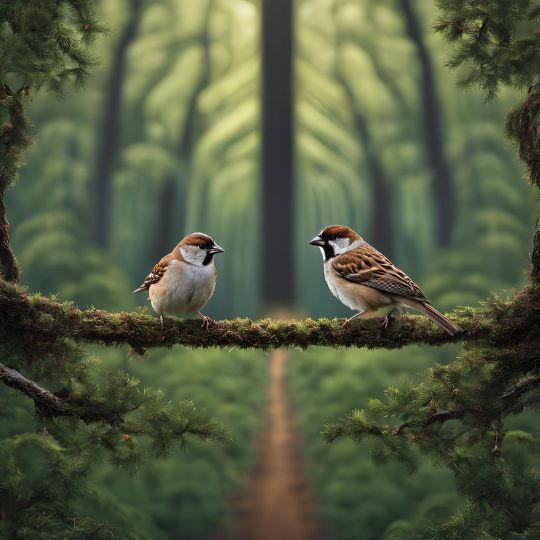

In [43]:
# Sample of an Image suitable for seam carving
# From Canva AI Image Generator
sparrow = Image.open('sparrow.jpg')
sparrow


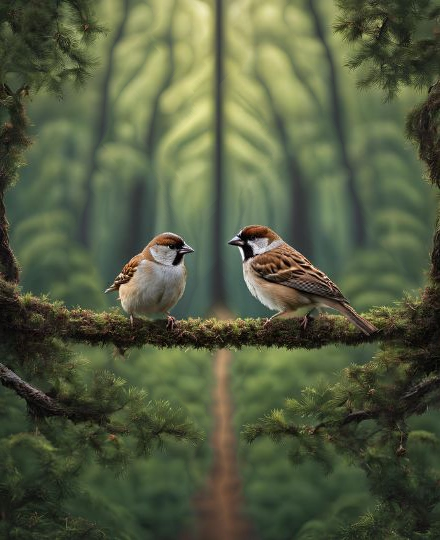

In [44]:
# Try Reducing the Width by 100 pixels

reduced_width_sparrow = reduce_width(sparrow, 100)
reduced_width_sparrow

# There are no visible artifacts in the image. The sparrows are closer in the resized image.

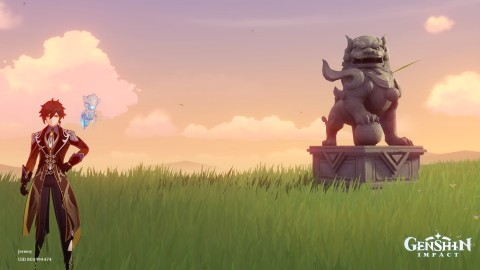

In [45]:
# Sample of an Image which is suitable for seam carving because the background, the sky, has uniform color.
# From Genshin Impact Photo Mode
zhongli = Image.open('zhongli.jpg')
zhongli

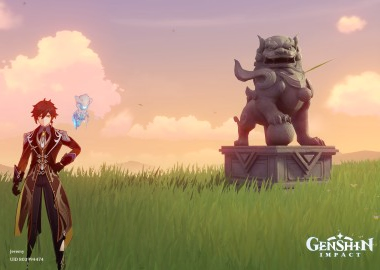

In [46]:
# Try Reducing the Width by 100 pixels

reduced_width_zhongli = reduce_width(zhongli, 100)
reduced_width_zhongli

# There are no artifacts on the sky or on the subject of the image. The clouds on the resized image don't show any artifacts or distortions.

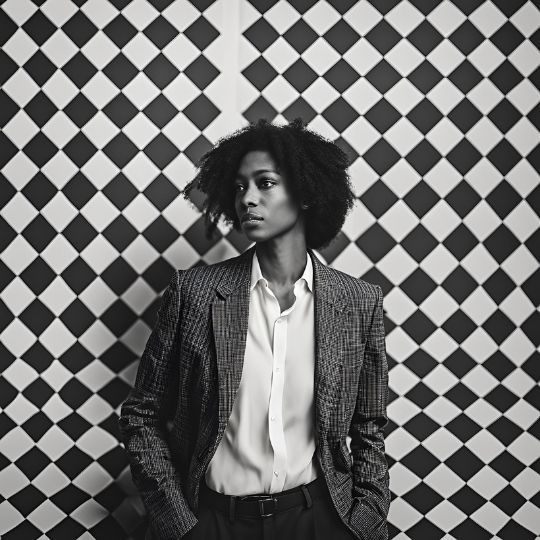

In [47]:
# Sample of an Image which is not suitable for seam carving because of abrupt changes in color in the checkered background
# From Canva AI Image Generator
checker = Image.open('checker.jpg')
checker

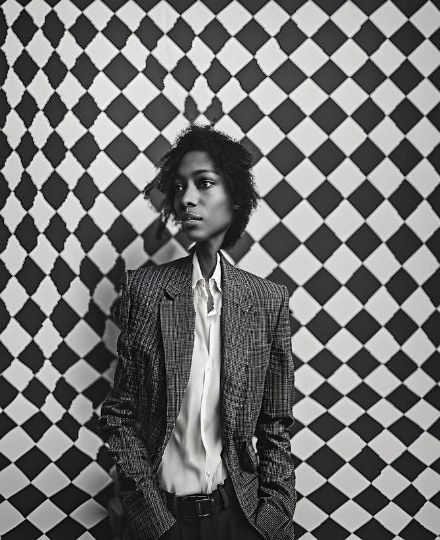

In [48]:
# Try Reducing the Width by 100 pixels

reduced_width_checker = reduce_width(checker, 100)
reduced_width_checker

# On the left side of the image, the checkered background became distorted after horizontal seams were removed.
# Moreover, the woman subject's face and body also got distorted as a result of the vertical seam carving.

8. Are smoothening and seam-carving commutative operations? Demonstrate and explain.

In [49]:
# Let's try smoothening first and then seam carving.

# Implement a gaussian filter of size 3

ocean_gaussian = ocean.filter(ImageFilter.GaussianBlur(3))

# Reduce width by 100 pixels

ocean_gaussian_carve = reduce_width(ocean_gaussian, 100)

In [50]:
# Now, let's do seam carving first then smoothening

ocean_carve = reduce_width(ocean, 100)
ocean_carve_gaussian = ocean_carve.filter(ImageFilter.GaussianBlur(3))

In [51]:
# Check if the two images are identical

ocean_gaussian_carve_array = np.asarray(ocean_gaussian_carve, dtype = "int32")
ocean_carve_gaussian_array = np.asarray(ocean_carve_gaussian, dtype = "int32")

if (ocean_gaussian_carve_array == ocean_carve_gaussian_array).all():
  print(True)
else:
  print(False)

False


Smoothening and seam carving are not commutative operations because when smoothening or blurring is done first, the contrast between the subject and the background is decreased, changing the energy values for the pixels. This would affect the DP algorithm used in seam carving and change what seams are identified as having the lowest energy. On the other hand, if seam carving is done first and then followed by smoothening, the seam identification process would not be affected by the blurring of the image.

9. Are sharpening and seam-carving commutative operations? Demonstrate and explain.

In [52]:
# Sharpening first then seam carving

# Use a 3x3 Laplacian filter

kernel_lap4 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
lap4_filter = ImageFilter.Kernel(size=(3, 3), kernel=kernel_lap4.flatten(), scale=1, offset=0)
ocean_lap4 = ocean.filter(lap4_filter)
ocean_sharpened = ImageChops.subtract(ocean, ocean_lap4)

# Vertical Seam Carving 100 pixels
ocean_sharpened_carve = reduce_width(ocean_sharpened, 100)

In [53]:
# Seam Carving first then sharpening

ocean_carve = reduce_width(ocean, 100)

kernel_lap4 = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
lap4_filter = ImageFilter.Kernel(size=(3, 3), kernel=kernel_lap4.flatten(), scale=1, offset=0)
ocean_lap4 = ocean_carve.filter(lap4_filter)
ocean_carve_sharpened = ImageChops.subtract(ocean_carve, ocean_lap4)

In [54]:
# Check if the two images are identical

ocean_sharpened_carve_array = np.asarray(ocean_sharpened_carve, dtype = "int32")
ocean_carve_sharpened_array = np.asarray(ocean_carve_sharpened, dtype = "int32")

if (ocean_sharpened_carve_array == ocean_carve_sharpened_array).all():
  print(True)
else:
  print(False)

False


Similarly, sharpening and seam carving are not commutative operations for a similar reason as why smoothening and seam carving are not commutative. If sharpening is done before seam carving, the sharpening operation enhances the fine details and the contrast in the image, which would affect the image's energy map. Meanwhile, if seam carving was done prior to sharpening, the seam identification process would not be affected by the sharpening and the incrased contrast in the image. Thus, the image where seam carving is done prior to sharpening would have different seams removed as opposed to the other image where sharpening is done prior to seam carving.

# References

Campbell, A. (2018, December 3). Seam Carving. https://andrewdcampbell.github.io/seam-carving

Image fromarray — PC-Pillow. (2022). Readthedocs.io. https://pc-pillow.readthedocs.io/en/latest/Image_class/Image_fromarray.html

Karanth, K. (2018, May 28). Implementing Seam Carving with Python | Karthik Karanth. Karthikkaranth.me. https://karthikkaranth.me/blog/implementing-seam-carving-with-python/

sobel — SciPy v1.14.1 Manual. (2024). Scipy.org. https://docs.scipy.org/doc/scipy/reference/generated/scipy.ndimage.sobel.html

Note: The Canva AI Image Generator tool was used for question 7.